<a href="https://colab.research.google.com/github/bachinaram/DataAnalytics1/blob/main/DA1_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


import numpy as np
from numpy import where
from numpy import unique

import pandas as pd
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 600)


from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as shc
import seaborn as sns
import math
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



In [ ]:
df = pd.read_csv('/content/sample_data/football_data.csv')

Data Cleaning


In [ ]:
def last_feature(my_value):
  if type(my_value) is float:
    return np.nan
  elif my_value == '':
    return np.nan
  elif my_value == np.nan:
    return np.nan
  elif my_value == ' ':
    return np.nan
  start = -10+6
  value_size = len(my_value)

  if value_size > 4:
    my_value = my_value[start:value_size]
  my_result = float(my_value)
  return my_result

In [ ]:
def convert_feet_to_inches(my_value):
  output=0
  first_of_my_value = 0
  second_of_my_value=0
  
  if type(my_value) is float:
    return np.nan
  elif my_value == '':
    return np.nan
  elif my_value == np.nan:
    return np.nan
  elif my_value == ' ':
    return np.nan

  value_size = len(my_value)
  my_value = my_value.split('\'')
  if value_size == 1:
    
    first_of_my_value = int(my_value[0])
    output = first_of_my_value*12
    return output
  else:
    first_of_my_value = int(my_value[0])
    second_of_my_value=my_value[1]
    output = first_of_my_value*12
    final_result= float(output)+float(second_of_my_value)
    return final_result

 

In [ ]:
def convert_wt_to_float(my_value):
  if type(my_value) is float:
    return np.nan
  elif my_value == '':
    return np.nan
  elif my_value == np.nan:
    return np.nan
  elif my_value == ' ':
    return np.nan


  act_len = len(my_value)
  act_len_final = act_len-3
  index=0
  my_value = my_value[index:act_len_final]
  result = float(my_value)
  return result



In [ ]:
def remove_time_feature(my_value):
  if type(my_value) is float:
    return np.nan
  elif my_value == '':
    return np.nan
  elif my_value == np.nan:
    return np.nan
  elif my_value == ' ':
    return np.nan
  act_len = len(my_value)
  act_len_final = act_len-1
  start=1
  my_value = my_value[start:act_len_final]
  result = float(my_value)
  return result

In [ ]:
def allnumeric_to_alldouble(my_value):
  if type(my_value) is float:
    return np.nan
  elif my_value == '':
    return np.nan
  elif my_value == np.nan:
    return np.nan
  elif my_value == ' ':
    return np.nan
  

  my_value = my_value.split('+')
  second_part=float(int(my_value[1]))
  first_part=float(int(my_value[0]))
  output = first_part + second_part
  return output

In [ ]:
def distance(x,c):
    sqrsum = 0
    for i in range(len(x)):
        sqrsum = sqrsum + ((x[i] - c[i]) ** 2)
    return sqrsum

In [ ]:
def calwss(centroid,cluster):
  wss = 0
  for i in range(len(centroid)):
    for j in range(len(cluster[i])):
      wss += distance(cluster[i][j],centroid[i])
  return math.sqrt(wss)

In [ ]:
def numeric_to_float(myvalue):
  a=myvalue[1]
  if myvalue == ' ':
    return np.nan
  elif myvalue == '':
    return np.nan
  elif myvalue == np.nan:
    return np.nan
  if a == '0':
    return np.nan
  act_len = len(myvalue)
  act_len_final = act_len -1  
  myvalue = myvalue[1:act_len_final]
  return float(myvalue)

In [ ]:
df.drop(df.columns[24], axis=1, inplace=True)
df['LDM'] = df['LDM'].apply(allnumeric_to_alldouble)
df['LS'] = df['LS'].apply(allnumeric_to_alldouble)
df['ST'] = df['ST'].apply(allnumeric_to_alldouble)
df['Wage'] = df['Wage'].apply(numeric_to_float)
df['LF'] = df['LF'].apply(allnumeric_to_alldouble)
df['CF'] = df['CF'].apply(allnumeric_to_alldouble)
df['RM'] = df['RM'].apply(allnumeric_to_alldouble)
df['Release Clause'] = df['Release Clause'].apply(remove_time_feature)
df['RF'] = df['RF'].apply(allnumeric_to_alldouble)
df['RW'] = df['RW'].apply(allnumeric_to_alldouble)
df['Weight'] = df['Weight'].apply(convert_wt_to_float)
df['CAM'] = df['CAM'].apply(allnumeric_to_alldouble)
df['RB'] = df['RB'].apply(allnumeric_to_alldouble)
df['LCB'] = df['LCB'].apply(allnumeric_to_alldouble)
df['RAM'] = df['RAM'].apply(allnumeric_to_alldouble)
df['LM'] = df['LM'].apply(allnumeric_to_alldouble)
df['RS'] = df['RS'].apply(allnumeric_to_alldouble)
df['LW'] = df['LW'].apply(allnumeric_to_alldouble)
df['CM'] = df['CM'].apply(allnumeric_to_alldouble)
df['Height'] = df['Height'].apply(convert_feet_to_inches)
df['RCM'] = df['RCM'].apply(allnumeric_to_alldouble)
df['LWB'] = df['LWB'].apply(allnumeric_to_alldouble)
df['Value'] = df['Value'].apply(numeric_to_float)
df['LCM'] = df['LCM'].apply(allnumeric_to_alldouble)
df['RDM'] = df['RDM'].apply(allnumeric_to_alldouble)
df['LAM'] = df['LAM'].apply(allnumeric_to_alldouble)
df['RWB'] = df['RWB'].apply(allnumeric_to_alldouble)
df['LB'] = df['LB'].apply(allnumeric_to_alldouble)
df['CB'] = df['CB'].apply(allnumeric_to_alldouble)
df['RCB'] = df['RCB'].apply(allnumeric_to_alldouble)
df['CDM'] = df['CDM'].apply(allnumeric_to_alldouble)
df['Contract Valid Until'] = df['Contract Valid Until'].apply(last_feature)


In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df1 = numeric_df.drop(numeric_df.columns[[0, 1]], axis=1)
cols = list(numeric_df1.columns)

for i in cols :
  numeric_df1[i] = numeric_df1[i].apply(lambda x: float(x))
  numeric_df1.fillna(value=numeric_df1[i].mean(),inplace= True)

In [ ]:
ss = MinMaxScaler()
data_scaled = ss.fit_transform(numeric_df1)

Bottom up Approach

In [ ]:
X = np.array(data_scaled)
wss = []
sil_score = []
c = [3,5,7,9,11]
s = []


Number of clusters :3

In [ ]:

for i in c:
  X = data_scaled.copy()
  agglo_model = AgglomerativeClustering(n_clusters=i,affinity='euclidean', linkage='ward')
  agglo_model.fit(X)
  cluster_labels = agglo_model.labels_
  agglo_clusters = agglo_model.fit_predict(X)
  s.append(silhouette_score(X,agglo_clusters))


print(s)


[0.2502321210282322, 0.21855820891313948, 0.20582952040657224, 0.2019349664041714, 0.1922910265532109]


Graph of Number of clusters vs Silhouette Score

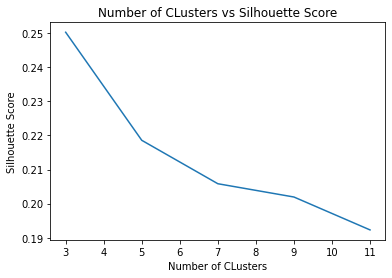

In [ ]:
plt.plot(c, s) 
plt.title('Number of CLusters vs Silhouette Score') 
plt.xlabel('Number of CLusters')
plt.ylabel('Silhouette Score')
plt.show()

Dendogram Agglomerative Clustering

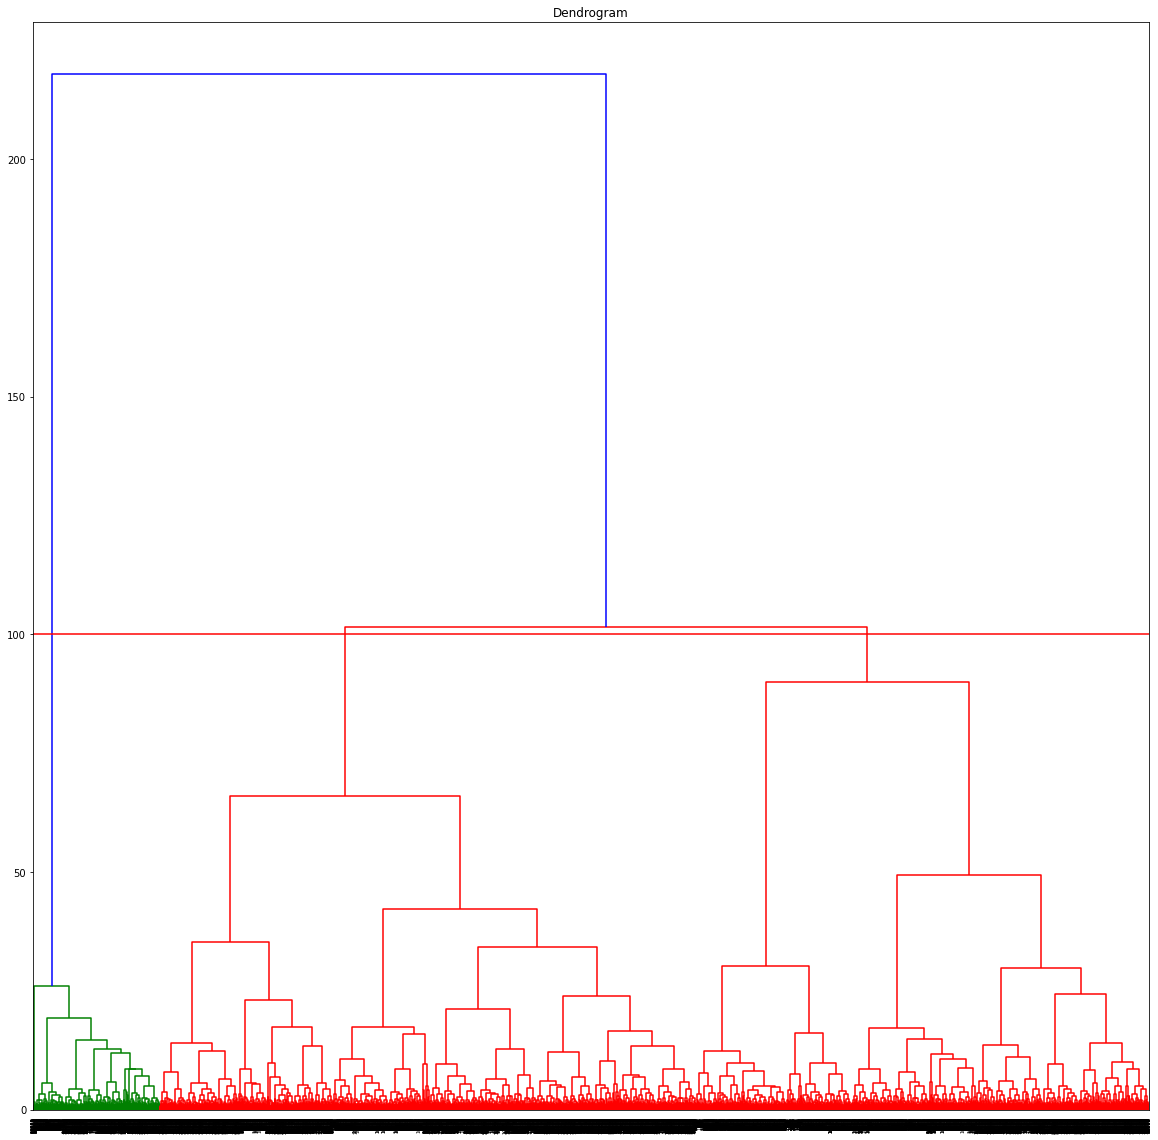

In [ ]:
plt.figure(figsize=(20, 20))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=100, color='r', linestyle='solid')

Best Bottom Up cluster with the Number of Clusters = 3

In [ ]:
X = data_scaled.copy()
agglo_model = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')
agglo_model.fit(X)
cluster_labels = agglo_model.labels_
agglo_clusters = agglo_model.fit_predict(X)
print(f'Number of leaves in our tree: {agglo_model.n_leaves_}')
print(f'Clusters Assignments: {agglo_clusters}')

Number of leaves in our tree: 18207
Clusters Assignments: [0 0 0 ... 0 0 2]


Finding Correlation Matrix and the most Correlated Attributes.

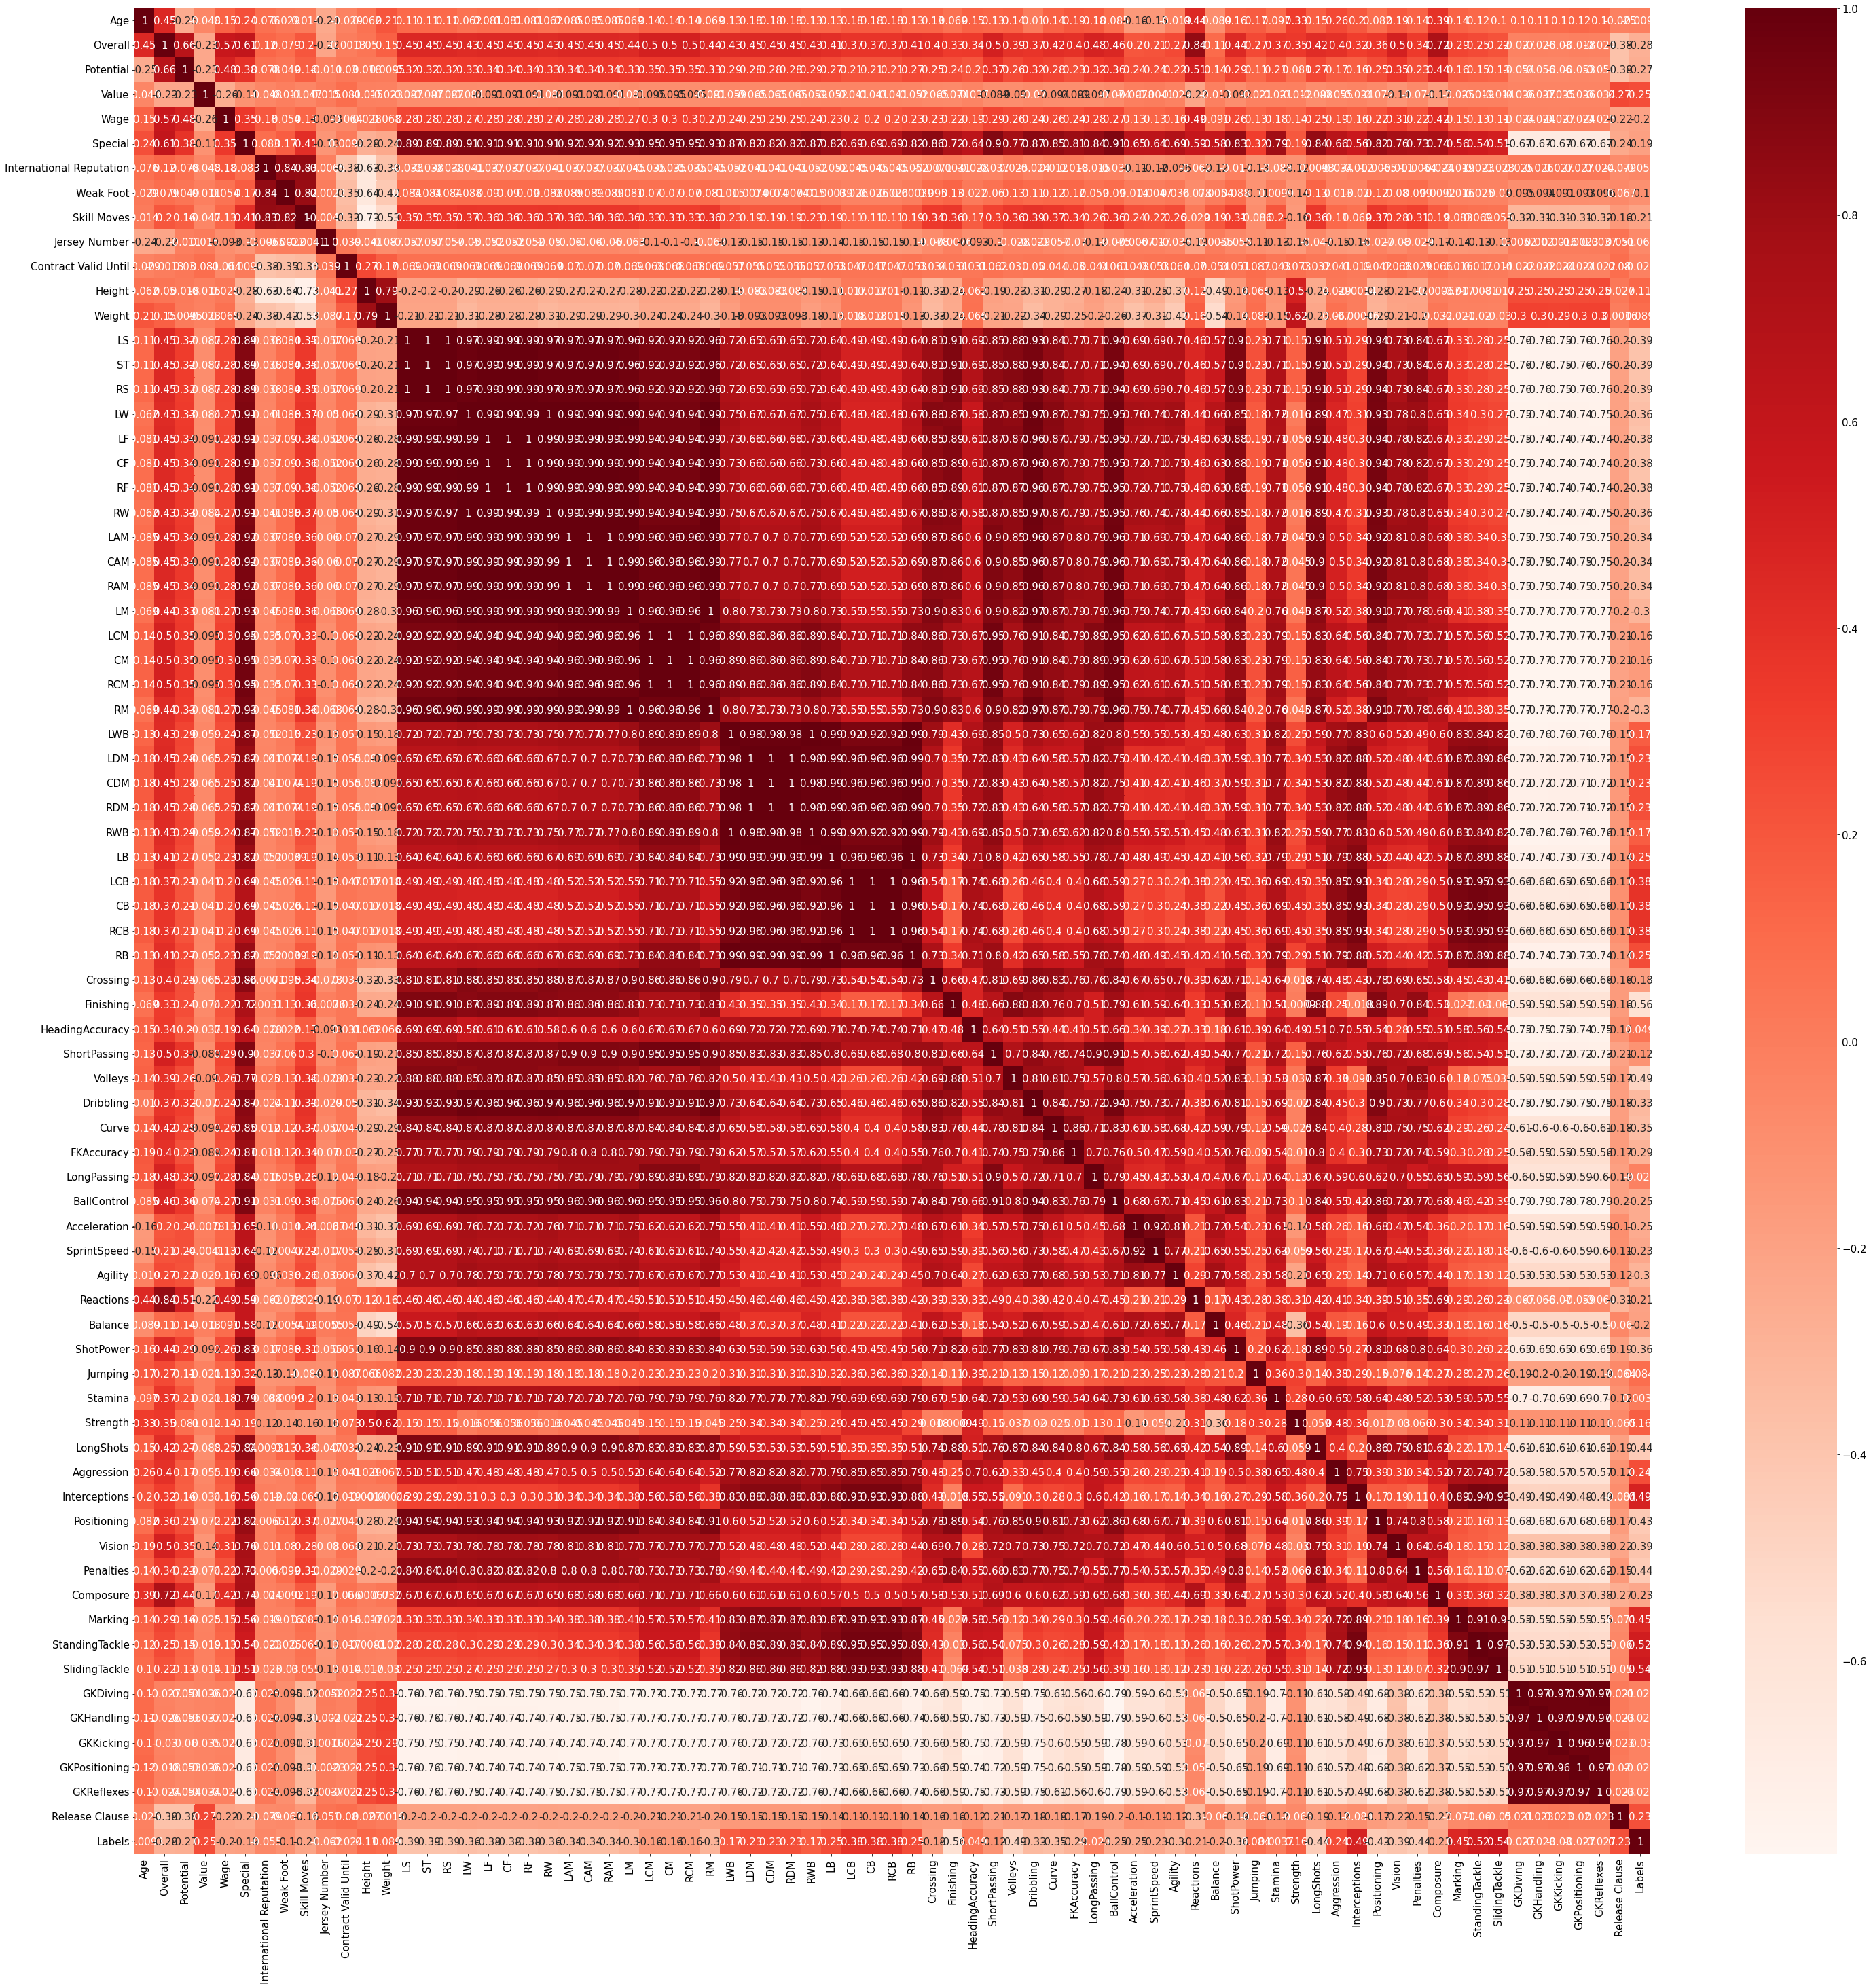

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(50,50),)
tdf = numeric_df1.copy()
tdf['Labels'] = agglo_clusters
cor = tdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
cor_target = abs(cor["Labels"])
relevant_features = cor_target[cor_target>0.4]
relevant_features

Finishing         0.564768
Volleys           0.491181
LongShots         0.439600
Interceptions     0.486244
Positioning       0.427222
Penalties         0.435975
Marking           0.454719
StandingTackle    0.519392
SlidingTackle     0.539956
Labels            1.000000
Name: Labels, dtype: float64

Distortion and Silhouette Score

In [ ]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(X, agglo_clusters)
centroids = clf.centroids_

In [ ]:
cluster = list()
wss = list()
sil_score = list()
np_c1 = []
np_c2 = []
np_c3 = []
  
for i in range(agglo_clusters.shape[0]):
  if(agglo_clusters[i] == 0):
    np_c1.append(X[i])
for i in range(agglo_clusters.shape[0]):
  if(agglo_clusters[i] == 1):
    np_c2.append(X[i])
for i in range(agglo_clusters.shape[0]):
  if(agglo_clusters[i] == 2):
    np_c3.append(X[i])

np_c11 = np.array(np_c1)
np_c21 = np.array(np_c2)
np_c31 = np.array(np_c3)

cluster.append(np_c11)
cluster.append(np_c21)
cluster.append(np_c31)
  

wss.append(calwss(centroids, cluster))
sil_score.append(silhouette_score(X, cluster_labels))

In [ ]:


# calwss(centroids, cluster)
print(wss[0])
print(silhouette_score(X, agglo_clusters))



148.51193620973658
0.2502321210282322


Cluster Name

In [ ]:


dic = {}
for i in range(len(cluster)):
  means = []
  for j in range(13,39):
    means.append(cluster[i][:,j].mean())
  if means.index(max(means))+15 not in dic:
    dic[means.index(max(means))+15] = max(means)
  else:
    s_means = set(means)
    s_means.remove(max(s_means))
    means = list(s_means)
    dic[means.index(max(means))+15] = max(means)
columns = numeric_df1.columns
for i in dic:
  print(columns[i])



CM
RS
CB


Number of Points in CLusters

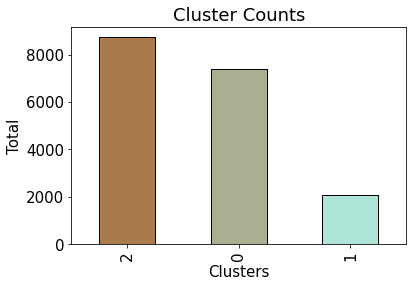

In [ ]:


target_counts = pd.Series(agglo_clusters).value_counts()
target_counts.plot.bar(color=['#aa7a4a', '#abae91', '#afe4d9'], 
                        edgecolor='black');
plt.title('Cluster Counts')
plt.xlabel('Clusters')
plt.ylabel('Total');



Cluster Visualization

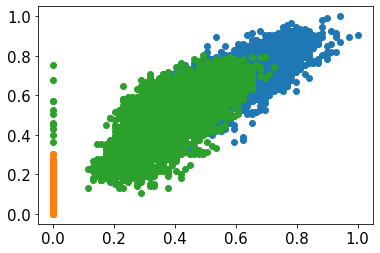

In [ ]:
clust = unique(agglo_clusters)
for cls in clust:
	row_ix = where(agglo_clusters == cls)
	plt.scatter(X[row_ix, 14], X[row_ix, 44])
 

Top Down Approach

In [ ]:
sil_score_td = []

Body of The Top Down Approach

In [ ]:
def top_down(cluster, num_of_cluster,cls_index):
  if len(all_clusters) == num_of_cluster:
    return
  km = KMeans(n_clusters=2,random_state=42)
  km.fit(cluster)
  centroids = km.cluster_centers_
  all_centroids.append(centroids[0])
  all_centroids.append(centroids[1])
  labels = km.labels_
  cluster_1 = []
  cluster_2 = []
  indices_1 = [] 
  indices_2 = []
  lab = all_indices.pop(cls_index)
  for i in range(len(labels)):
    if labels[i] == 0:
      cluster_1.append(cluster[i])
      indices_1.append(lab[i])
    else:
      cluster_2.append(cluster[i])
      indices_2.append(lab[i])
  all_clusters.append(cluster_1)
  all_clusters.append(cluster_2)
  all_indices.append(indices_1)
  all_indices.append(indices_2)
  if len(all_clusters) == num_of_cluster:
    return
  intra_dist = []
  for i in range(len(all_clusters)):
    dist_intra = 0
    for j in all_clusters[i]:
      dist_intra += distance(all_centroids[i],j)
    intra_dist.append(dist_intra/len(all_clusters[i]))
  index = intra_dist.index(max(intra_dist))
  cluster = all_clusters.pop(index)
  all_centroids.pop(index)
  if len(all_clusters) == num_of_cluster:
    return
  top_down(cluster,num_of_cluster,index)

Number of CLuster = 3

In [ ]:
c = [3,5,7,9,11]
for j in c:
  X = data_scaled.copy()
  all_clusters = []
  all_centroids = []
  temp = []
  for i in range(X.shape[0]):
    temp.append(i)
  all_indices = []
  all_indices.append(temp)
  cls_index = 0
  top_down(X,j,cls_index)
  label = [None]*X.shape[0]
  l = 0
  for indices in all_indices:
    for i in indices:
      label[i] = l
    l = l+1
  sil_score_td.append(silhouette_score(X,label))

Graph of Number of CLusters vs Silhouette Score.

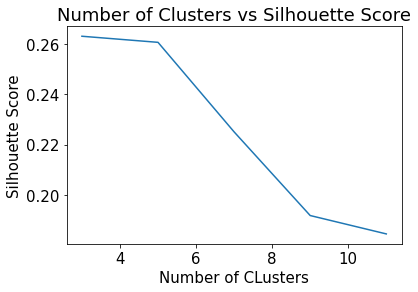

In [ ]:

plt.plot(c, sil_score_td) 
plt.title('Number of Clusters vs Silhouette Score') 
plt.xlabel('Number of CLusters')
plt.ylabel('Silhouette Score')
plt.show()

Best Top Down Model with Cluster Number = 3

In [ ]:
X = data_scaled.copy()
all_clusters = []
all_centroids = []
temp = []
for i in range(X.shape[0]):
  temp.append(i)
all_indices = []
all_indices.append(temp)
cls_index = 0
top_down(X,3,cls_index)
label = [None]*X.shape[0]
l = 0
for indices in all_indices:
  for i in indices:
    label[i] = l
  l = l+1

In [ ]:
wss.append(calwss(all_centroids,all_clusters))
sil_score.append(silhouette_score(X,label))

##Intra Class Distortion and Silhouette Score

In [ ]:
print(wss[1])
print(sil_score[1])

144.59723205507896
0.26305294569383864


Dendrogram of Divisive Clustering

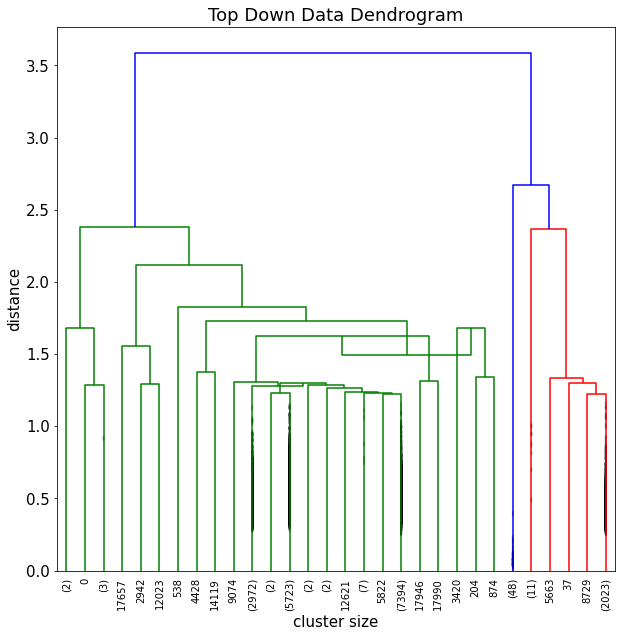

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
X = data_scaled.copy()
distances = linkage(X, method="centroid", metric="euclidean")
def annotated_dendrogram(*args, **kwargs):
    scipy_dendro = dendrogram(*args, truncate_mode='lastp', show_contracted=True,leaf_rotation=90.)

    plt.title('Top Down Data Dendrogram')
    plt.xlabel('cluster size')
    plt.ylabel('distance')
    
    for i, d, c in zip(scipy_dendro['icoord'], scipy_dendro['dcoord'], scipy_dendro['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        if y > 10:
            plt.plot(x, y, 'o', c=c)
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    return scipy_dendro
plt.figure(figsize=(10,10))
dn = annotated_dendrogram(distances)
plt.show()

Correlation Matring and the most correlated attributes in the cluster.

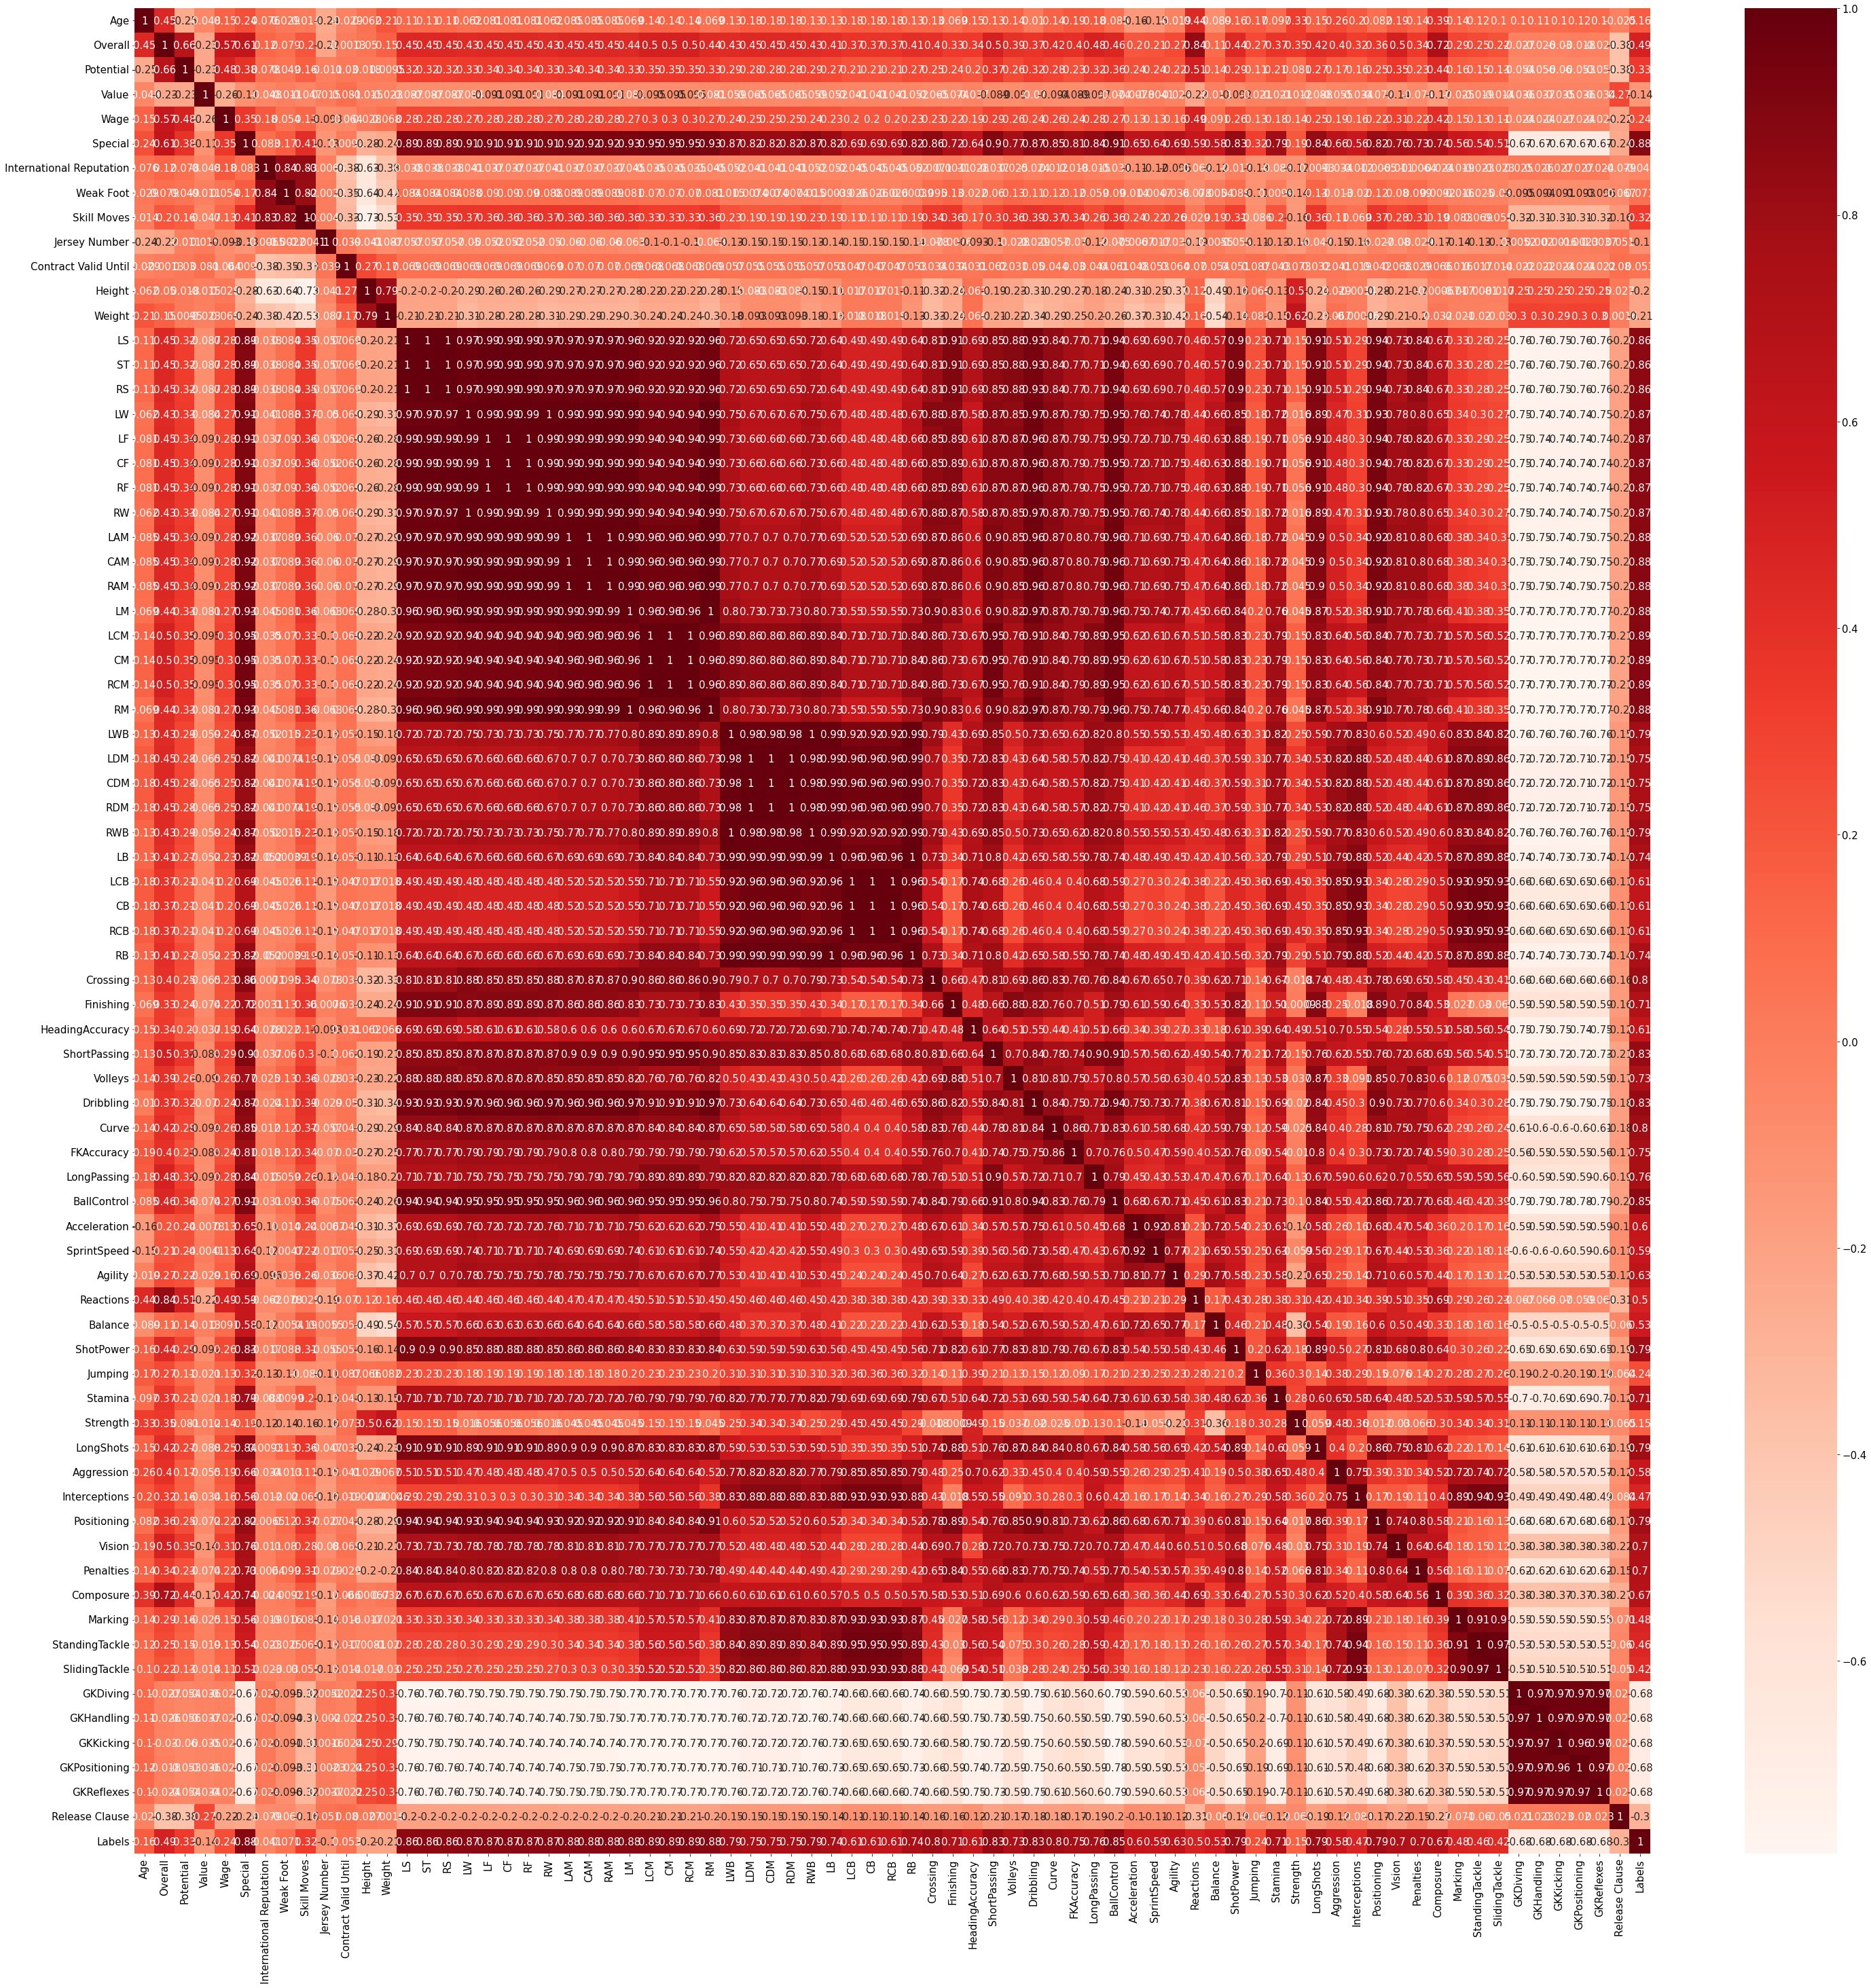

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(50,50),)
tdf = numeric_df1.copy()
tdf['Labels'] = label
cor = tdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
cor_target = abs(cor["Labels"])
relevant_features = cor_target[cor_target>0.8]
relevant_features

Special         0.883045
LS              0.860548
ST              0.860548
RS              0.860548
LW              0.868955
LF              0.870955
CF              0.870955
RF              0.870955
RW              0.868955
LAM             0.880156
CAM             0.880156
RAM             0.880156
LM              0.881441
LCM             0.894465
CM              0.894465
RCM             0.894465
RM              0.881441
ShortPassing    0.831851
Dribbling       0.827068
BallControl     0.854948
Labels          1.000000
Name: Labels, dtype: float64

Cluster Names

In [ ]:
dic = {}
cluster = []
for i in range(len(all_clusters)):
  cluster.append(np.array(all_clusters[i]))
for i in range(len(cluster)):
  means = []
  for j in range(13,39):
    means.append(cluster[i][:,j].mean())
  if means.index(max(means))+15 not in dic:
    dic[means.index(max(means))+15] = max(means)
  else:
    s_means = set(means)
    s_means.remove(max(s_means))
    means = list(s_means)
    dic[means.index(max(means))+15] = max(means)
columns = numeric_df1.columns
for i in dic:
  print(columns[i])

RCB
CB
CM


Number of Points in a Cluster

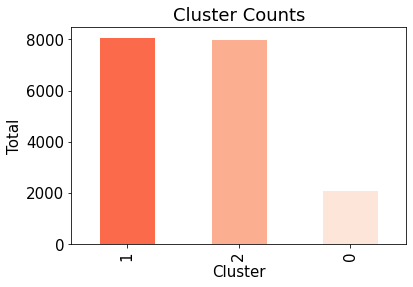

In [ ]:


target_counts = pd.Series(label).value_counts()
target_counts.plot.bar(color=['Red', 'green', 'blue']);

plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Total');



In [ ]:
print("\nCluster", 0, " : " , target_counts[0])
print("\nCluster", 1, " : " , target_counts[1])
print("\nCluster", 2, " : " , target_counts[2])


Cluster 0  :  2109

Cluster 1  :  8088

Cluster 2  :  8010


Cluster Visualization


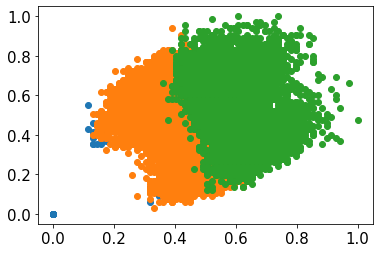

In [ ]:
clust = unique(label)
for cls in clust:
	row_ix = where(label == cls)
	plt.scatter(X[row_ix, 14], X[row_ix, 37])

#Comparison of Agglomerative and Divisive

Text(0.5, 1.0, 'Distortion Comparison Between Bottom up and Top Down Approach')

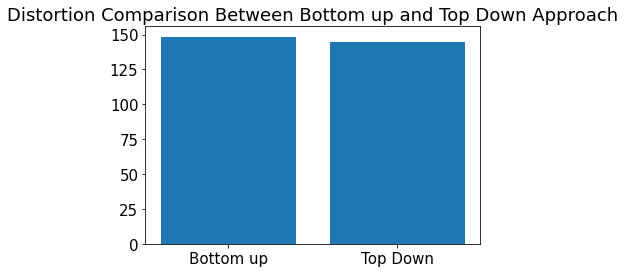

In [ ]:
D = {'Bottom up':wss[0],'Top Down':wss[1]}
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.title('Distortion of Agglomerative and Divisive')



Text(0.5, 1.0, 'Silhouette Score Comparison Between Bottom up and Top Down Approach')

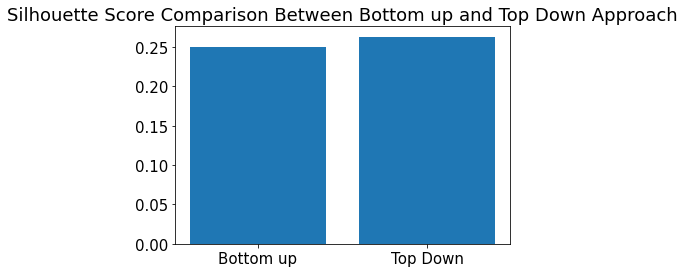

In [ ]:
D = {'Agglomerative':sil_score[0],'Divisive':sil_score[1]}
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.title('Silhouette Score of Agglomerative and Divisive')